# **Classifying Images with Deep Convolutional Neural Networks (Part 1/2)**

- Covers convolutional neural networks (CNNs) for image classification.

- Deeper dive into the CNN architecture and explore how to implement CNNs in PyTorch. 
  - Convolution operations in one and two dimensions.
  - The building blocks of CNN architectures.
  - Implementing deep CNNs in PyTorch.
  - Data augmentation techniques for improving the generalization performance.
  - Implementing a facial CNN classifier for recognizing if someone is smiling or not.



In [3]:
from IPython.display import Image
%matplotlib inline

### **The building blocks of CNNs**

- CNNs were inspired by how the visual cortex of the human brain works when recognizing objects.
- The human visual cortex
  - The primary layer detects edges and straight lines
  - higher-order layers focus more on extracting complex shapes and patterns.

### **Understanding CNNs and feature hierarchies**

- Certain types of NNs, such as CNNs, can automatically learn the features from raw data that are most useful for a particular task. For this reason, it’s common to consider CNN layers as feature extractors:
  - the early layers (those right after the input layer) extract low-level features from raw data
  - and the later layers (often fully connected layers, as in a multilayer perceptron (MLP)) use these features to predict a continuous target value or class label.

- Certain types of `multilayer NNs`, and in particular, `deep CNNs`, construct a so-called `feature hierarchy` by combining the low-level features in a layer-wise fashion to form high-level features.
- For example, if we’re dealing with images, then `low-level features`, such as `edges` and `blobs`, are extracted from the earlier layers, which are combined to form `high-level` features. 
- These `high-level` features can form more complex shapes, such as the general contours of objects like buildings, cats, or dogs.



![Creating feature maps from an image](./figures/feature-maps-from-an-image.png)

- As seen from the figure above, a `CNN` computes `feature maps` from an input image, where each element comes from a local patch of pixels in the input image.

- This local patch of pixels is referred to as the `local receptive field`. CNNs will usually perform very well on image-related tasks, and that’s largely due to two important ideas:
  - `Sparse connectivity:` A single element in the feature map is connected to only a small patch of pixels.
  - `Parameter sharing:` The same weights are used for different patches of the input image.


- As a direct consequence of these two ideas, replacing a conventional, fully connected MLP with a convolution layer substantially decreases the number of weights (parameters) in the network, and we will see an improvement in the ability to capture `salient features`.
- In the context of image data, it makes sense to assume that nearby pixels are typically more relevant to each other than pixels that
are far away from each other.


- Typically, CNNs are composed of several convolutional and subsampling layers that are followed by one or more fully connected layers at the end. 
- The fully connected layers are essentially an MLP, where every input unit, $i$, is connected to every output unit, $j$, with weight $w_{ij}$.


- Please note that `subsampling(Downsampling) layers`, commonly known as `pooling layers`, do not have any learnable parameters; for instance, there are no weights or bias units in pooling layers.
- However, both the convolutional and fully connected layers have weights and biases that are optimized during training.

#### **Performing discrete convolutions**

- A discrete convolution (or simply convolution) is a fundamental operation in a CNN.
- Discuss some of the `Naive algorithms` to compute convolutions of one-dimensional tensors (vectors) and two-dimensional tensors (matrices).



#### **Discrete convolutions in one dimension**

- A discrete convolution for two vectors, $x$ and $w$, is denoted by $y = x * w$, in which vector $x$ is our input (sometimes called `signal`) and $w$ is called the `filter` or `kernel`.
- A discrete convolution is mathematically defined as follows;

$$y = x * w \rarr y[i] = \sum^{+ \infty}_{k \space = - \infty} x[i - k] \space w[k]$$


- The fact that the sum runs through indices from `–∞` to `+∞` seems odd, mainly because in machine learning applications, we always deal with finite feature vectors. For example, if $x$ has `10` features with indices `0, 1, 2, ..., 8, 9,` then indices `–∞: –1` and `10: +∞` are out of bounds for $x$. Therefore, to correctly compute the summation shown in the preceding formula, it is assumed that $x$ and $w$ are filled with
zeros. This will result in an output vector, $y$, that also has infinite size, with lots of zeros as well. Since this is not useful in practical situations, $x$ is padded only with a finite number of zeros.

- This process is called `zero-padding` or simply `padding`. Here, the number of zeros padded on each side is denoted by $p$.


![Padding](./figures/padding.png)


![Padding process](./figures/part-1.png)

![Discrete Convolution](./figures/discrete-convolution.png)



- The rotated filter $w^{r}$, is shifted by two cells each time we `shift`.
- This shift is another hyperparameter of a convolution, the `stride`, $s$.
- In the example above, the `stride` is two, $s = 2$.
- `stride` has to be positive number smaller than the size of the input vector.

#### **Padding inputs to control the size of the output feature maps**


Padding controls how convolutional filters interact with the boundaries of an input. The choice of padding affects:

* How uniformly positions in the input contribute to the output

* The size of the output feature map

* Whether information at the borders is preserved or diminished



**Uneven Contribution Without Padding**

Given:

* Input length: $(n = 5)$

* Filter size: $(m = 3)$

* Padding: $(p = 0)$

Elements near the edges participate in fewer convolution windows:

* $(x_0)$ contributes to only one output (e.g., $(y_0)$).

* $(x_2)$ (middle element) contributes to three outputs.

This gives **middle elements disproportionate influence**.
Choosing padding $(p = 2)$ ensures:

* Every input element participates in **three** output computations.

* This restores **uniform contribution** across the input.



**Padding Modes**

Three padding strategies are commonly used in convolutional neural networks:



**1. Full Padding**

* Padding: $( p = m - 1 )$

* Output size increases.

* Rarely used in CNNs because it expands feature map size unnecessarily.



**2. Same Padding**

* Goal: Output size equals input size.

* Padding is chosen so that:
  
  $$n_{\text{out}} = n_{\text{in}}$$
  
* Ensures border information is preserved.

* Most commonly used in modern CNNs.



**3. Valid Padding**

* Padding: $( p = 0 )$

* No padding → only valid positions are convolved.

* Output shrinks:
  
  $$n_{\text{out}} = n - m + 1$$
  
* Loses edge information; useful when feature reduction is desired.



**Summary Table**

| Padding Mode | (p) Value                 | Output Size   | Effect                     |
| ------------ | ------------------------- | ------------- | -------------------------- |
| **Full**     | $(m - 1)$                   | Larger        | Expands feature map; rare  |
| **Same**     | Computed to preserve size | Same as input | Keeps borders; widely used |
| **Valid**    | $(0)$                       | Smaller       | No padding; reduces size   |

The choice of padding shapes how much the network preserves border information and how deeply each input location influences the output.



![Three modes of padding](./figures/3-modes-padding.png)



**Padding Modes in CNNs — Key Insights**

**Same Padding (Most Common in CNNs)**

Same padding is the default choice in modern convolutional neural networks because:

* It **preserves spatial dimensions** (height and width for images, or vector length for 1D signals).

* It makes **architecture design simpler**—you don’t need to track shrinking sizes after every layer.

* It maintains **feature alignment** across layers, which is particularly useful when using skip connections (for example, in ResNets or U-Nets).



**Why Valid Padding Is Rarely Used in Deep CNNs**

Valid padding (no padding) has a major drawback:

* Each convolution **shrinks** the spatial dimensions.

* With many layers, the shrinking compounds, potentially collapsing the feature map to an unusable size.

* This spatial reduction removes information prematurely, hurting overall performance.

In practice:

* Spatial reductions should be **intentional**, typically done using:

  * **Pooling layers** (max/avg pool)
  * **Strided convolutions** (stride = 2)

* Convolutions themselves are usually kept with **same padding** to maintain feature map resolution.



**Why Full Padding Is Rarely Used in Deep Learning**

Full padding adds $(m-1)$ pixels (or elements) on both sides, causing the output to be **larger** than the input.

* Historically used in **signal processing** to mitigate boundary effects.

* In deep learning, boundary effects are not usually problematic.

* Increasing spatial size artificially complicates architecture design and is computationally wasteful.

As a result, full padding is almost never used in CNN architectures designed for feature extraction.



**Practical Rule**

Use **same padding** for nearly all convolutions unless there is a deliberate architectural reason not to.

* Preserve spatial size → same padding

* Intentionally downsample → pooling or stride

* Rarely expand size → full padding (mostly in classical signal processing)




#### **Determining the size of the convolution output**


For a 1D convolution with:

* Input size: $`n`$
* Kernel size: $`m`$
* Padding: $`p`$
* Stride: $`s`$

the output size is:

$$\text{output\_size} = \left\lfloor \frac{n + 2p - m}{s} \right\rfloor + 1$$



**Example 1 — Kernel 5, Padding 2, Stride 1**

Given:

* $`n = 10`$
* $`m = 5`$
* $`p = 2`$
* $`s = 1`$

Compute:

$$\left\lfloor \frac{10 + 2 \times 2 - 5}{1} \right\rfloor + 1 = \left\lfloor \frac{10 + 4 - 5}{1} \right\rfloor + 1 = \left\lfloor 9 \right\rfloor + 1 = 10$$

**Output size = 10**, equal to the input → same padding.



**Example 2 — Kernel 3, Padding 2, Stride 2**

Given:

* $`n = 10`$
* $`m = 3`$
* $`p = 2`$
* $`s = 2`$

Compute:

$$\left\lfloor \frac{10 + 2 \times 2 - 3}{2} \right\rfloor + 1 = \left\lfloor \frac{10 + 4 - 3}{2} \right\rfloor + 1 = \left\lfloor \frac{11}{2} \right\rfloor + 1 = 5 + 1 = 6$$

**Output size = 6**.



This formula generalizes to 2D and 3D convolutions by applying it per dimension (height, width, depth).



- How to compute convolutions in one dimension, a naive implementation is shown below;

In [1]:
import numpy as np 
import torch

In [2]:
def conv1d(x, w, p=0, s=1):
    w_rot = np.array(w[::-1])
    x_padded = np.array(x)
    if p > 0:
        zero_pad = np.zeros(shape=p)
        x_padded = np.concatenate(
            [zero_pad, x_padded, zero_pad])
    res = []
    for i in range(0, (int((len(x_padded) - len(w_rot))/s) + 1) * s, s):
        res.append(np.sum(
            x_padded[i:i + w_rot.shape[0]] * w_rot))
    return np.array(res)


## Testing:
x = [1, 3, 2, 4, 5, 6, 1, 3]
w = [1, 0, 3, 1, 2]

print('Conv1d Implementation:',
      conv1d(x, w, p=2, s=1))

print('Numpy Results:',
      np.convolve(x, w, mode='same')) 

Conv1d Implementation: [ 5. 14. 16. 26. 24. 34. 19. 22.]
Numpy Results: [ 5 14 16 26 24 34 19 22]


#### **Performing a Discrete Convolution in 2D**


A **2D discrete convolution** extends the same principles from 1D to two spatial dimensions.
Given:

* Input matrix
  $$X \in \mathbb{R}^{n_1 \times n_2}$$

* Filter (kernel) matrix
  $$W \in \mathbb{R}^{m_1 \times m_2}$$, with $$m_1 \le n_1$$ and $$m_2 \le n_2$$


the output matrix $`Y`$ is defined as:

$$Y[i, j] = \sum_{u=-\infty}^{+\infty} \sum_{v=-\infty}^{+\infty} X[i - u, \, j - v] \, W[u, v]$$

This is the full mathematical definition using infinite sums (implicitly assuming zero outside bounds).
Practical implementations restrict the sums to the actual filter dimensions.



**Practical 2D Convolution (Finite Filter)**

If the filter size is $`m_1 \times m_2`$, the working formula becomes:

$$Y[i,j] = \sum_{u=0}^{m_1 - 1} \sum_{v=0}^{m_2 - 1}
X[i + u,\, j + v] \, W[m_1 - 1 - u,\, m_2 - 1 - v]$$

Here:

* The filter is **rotated by 180°**, as required by true convolution (not correlation).

* The filter slides over the input independently along each axis.



**Key Extensions From 1D to 2D**

All concepts from 1D convolution extend naturally to 2D:

**1. Zero Padding**

Pad the input with zeros along height and width:

* Padding $`p_1`$ on vertical dimension

* Padding $`p_2`$ on horizontal dimension

**2. Strides**

Step sizes when sliding the filter:

* Stride $`s_1`$ vertically

* Stride $`s_2`$ horizontally

**3. Output Size Formula**

For padded input and strides, the output size is:

$$\text{height\_out} = \left\lfloor \frac{n_1 + 2p_1 - m_1}{s_1} \right\rfloor + 1$$

$$\text{width\_out} = \left\lfloor \frac{n_2 + 2p_2 - m_2}{s_2} \right\rfloor + 1$$

This generalizes the 1D case by applying the formula per dimension.



**Interpretation**

* If one dimension is removed, the formula collapses exactly to 1D convolution.

* 2D convolution is effectively **“sliding, multiplying, summing”** in both axes.

* These operations form the basis of convolutional neural networks (CNNs).



![Output of 2D Convolution](./figures/output-2d-conv.png)

- The following example illustrates the computation of a `2D` convolution between an input matrix, $X_{3 \times 3}$, and a kernel matrix, $W_{3 \times 3}$, using padding $p = (1, 1)$ and stride $s = (2, 2)$. 

- According to the specified padding, one layer of zeros is added on each side of the input matrix, which results in the padded matrix $X_{5 \times 5}^{padding}$, as follows:

![Computing a 2D convolution between an input and kernel matrix](./figures/input-output-kernel.png)

with the preceding filter, the rotated filter will be:

$$W^{r} = 
\begin{bmatrix}
0.5 & 1   & 0.5 \\
0.1 & 0.4 & 0.3 \\
0.4 & 0.7 & 0.5
\end{bmatrix}
$$


- Next, we can shift the rotated filter matrix along the padded input matrix, $X^{padded}$, like a sliding window, and compute the sum of the element-wise product, which is denoted by the ⨀ operator in the figure below;


![Computing the sum of the element-wise product](./figures/sum-of-element-wise-product.png)


- The result will be the $2 \times 2$ matrix, $Y$.



**Element-wise Product of a 2×2 Matrix**

Given two matrices of the same size:

$`A =
\begin{bmatrix}
a_{11} & a_{12} \\
a_{21} & a_{22}
\end{bmatrix},
\quad
B =
\begin{bmatrix}
b_{11} & b_{12} \\
b_{21} & b_{22}
\end{bmatrix}`$

Their **element-wise product** (Hadamard product), denoted by $`A \odot B`$, is:

$`A \odot B =
\begin{bmatrix}
a_{11} b_{11} & a_{12} b_{12} \\
a_{21} b_{21} & a_{22} b_{22}
\end{bmatrix}`$

**Concrete Example**

Let:

$`A =
\begin{bmatrix}
2 & 3 \\
4 & 5
\end{bmatrix},
\quad
B =
\begin{bmatrix}
6 & 7 \\
8 & 9
\end{bmatrix}`$

Then:

$$
A \odot B =
\begin{bmatrix}
2 \cdot 6 & 3 \cdot 7 \
4 \cdot 8 & 5 \cdot 9
\end{bmatrix}
=

\begin{bmatrix}
12 & 21 \
32 & 45
\end{bmatrix}
$$


- Rotating a matrix

In [3]:
import numpy as np

# Create an example matrix
matrix = np.array([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]])

print("Original matrix:")
print(matrix)

# Rotate the matrix 90 degrees counter-clockwise (default behavior)
rotated_matrix_90 = np.rot90(matrix, k=1)
print("\nRotated 90 degrees counter-clockwise:")
print(rotated_matrix_90)

Original matrix:
[[1 2 3]
 [4 5 6]
 [7 8 9]]

Rotated 90 degrees counter-clockwise:
[[3 6 9]
 [2 5 8]
 [1 4 7]]


In [4]:
# Create an example matrix
matrix = np.array([[0.5, 0.7, 0.4],
                   [0.3, 0.4, 0.1],
                   [0.5, 1, 0.5]])

# Rotate the matrix 180 degrees counter-clockwise (k=2)
m_r = np.rot90(matrix, k=2)
m_r

array([[0.5, 1. , 0.5],
       [0.1, 0.4, 0.3],
       [0.4, 0.7, 0.5]])

In [5]:
matrix[::-1, ::-1]

array([[0.5, 1. , 0.5],
       [0.1, 0.4, 0.3],
       [0.4, 0.7, 0.5]])

- Let’s also implement the `2D convolution` according to the naive algorithm described. The `scipy.signal` package provides a way to compute 2D convolution via the `scipy.signal.convolve2d` function:

In [6]:
import scipy.signal


def conv2d(X, W, p=(0, 0), s=(1, 1)):
    W_rot = np.array(W)[::-1,::-1]
    X_orig = np.array(X)
    n1 = X_orig.shape[0] + 2*p[0]
    n2 = X_orig.shape[1] + 2*p[1]
    X_padded = np.zeros(shape=(n1, n2))
    X_padded[p[0]:p[0]+X_orig.shape[0],
    p[1]:p[1]+X_orig.shape[1]] = X_orig

    res = []
    for i in range(0, (int((X_padded.shape[0] -
                            W_rot.shape[0]) / s[0]) + 1) * s[0], s[0]):
        res.append([])
        for j in range(0, (int((X_padded.shape[1] -
                                W_rot.shape[1]) / s[1]) + 1) * s[1], s[1]):
            X_sub = X_padded[i:i + W_rot.shape[0],
                    j:j + W_rot.shape[1]]
            res[-1].append(np.sum(X_sub * W_rot))
    return(np.array(res))

X = [[1, 3, 2, 4], [5, 6, 1, 3], [1, 2, 0, 2], [3, 4, 3, 2]]
W = [[1, 0, 3], [1, 2, 1], [0, 1, 1]]

print('Conv2d Implementation:\n',
    conv2d(X, W, p=(1, 1), s=(1, 1)))


print('SciPy Results:\n',
    scipy.signal.convolve2d(X, W, mode='same'))

Conv2d Implementation:
 [[11. 25. 32. 13.]
 [19. 25. 24. 13.]
 [13. 28. 25. 17.]
 [11. 17. 14.  9.]]
SciPy Results:
 [[11 25 32 13]
 [19 25 24 13]
 [13 28 25 17]
 [11 17 14  9]]


#### **Subsampling layers (pooling layers)**

**Subsampling Layers in CNNs (Max-Pooling and Mean-Pooling)**

Subsampling (pooling) operations reduce the spatial resolution of feature maps while preserving the most important information. The two main forms used in CNNs are **max-pooling** and **mean-pooling (average-pooling)**.


**Pooling Layer Notation**

A pooling layer is written as:

$$P_{n_1 \times n_2}$$

where:

* $`n_1 \times n_2`$ is the **pooling size**, i.e., the spatial window over which the pooling operation (max or mean) is applied.

* The pooling window slides across the input with a default stride equal to its size (common in practice).



- The operation described in the figure below. Here, `max-pooling` takes the maximum value from a neighborhood of pixels, and `mean-pooling` computes their average.


![Max pooling and mean pooling](./figures/max-mean-pooling.png)


#### **Advantages of Pooling**

**1. Local Invariance (Especially with Max-Pooling)**

Pooling—particularly max-pooling—introduces **local invariance**.

Small variations in the input (such as noise, small shifts, or perturbations) do not change the pooled output.

**Example (Max-Pooling with $`P_{2\times 2}`$):**

Even though the matrices $`X_1`$ and $`X_2`$ differ element-wise, the 2×2 max-pooled outputs are identical:

$$X_1 \xrightarrow{P_{2\times 2}}
\begin{bmatrix}
255 & 125 & 170 \\
255 & 150 & 150 \\
70 & 200 & 95
\end{bmatrix}$$

$$X_2 \xrightarrow{P_{2\times 2}}
\begin{bmatrix}
255 & 125 & 170 \\
255 & 150 & 150 \\
70 & 200 & 95
\end{bmatrix}$$

This demonstrates robustness to local variations.



**2. Feature Size Reduction**

Pooling reduces:

* Spatial dimensionality

* Number of features

* Computational cost of subsequent layers

It may also reduce **overfitting** by decreasing representational capacity.



**CNNs Without Pooling**

Modern architectures (e.g., ResNet-variants, some vision transformers, and fully convolutional nets) sometimes **remove pooling layers entirely**.

Instead, they reduce feature size using **convolutional layers with stride 2**.

A convolution with stride 2 acts similarly to pooling but has **learnable weights**, meaning:

* It can adapt to data

* It may preserve more task-specific information

Thus, a strided convolution can be viewed as a “learnable pooling operation.”


### **Putting everything together – implementing a CNN**


Traditional multilayer neural networks and convolutional neural networks (CNNs) share the same fundamental goal: compute **pre-activations**, pass them through **activation functions**, and learn hierarchical representations. The key difference lies in **how** the pre-activations are computed.


**Matrix Multiplication in Traditional Neural Networks**

In a standard multilayer NN:

* Inputs are represented as a vector $`x \in \mathbb{R}^n`$

* A layer computes pre-activations using:

$$z = Wx + b$$

Here:

* $`W`$ is a dense weight matrix

* Each hidden unit connects to **every** input element

* Computational cost scales with the full input dimensionality

This approach **ignores spatial structure** (height × width) of images, because the image is flattened into a vector.



**Convolution as the Core Operation in CNNs**

In CNNs, instead of matrix multiplication, pre-activations are computed via **convolution operations**:

$$Z = X * W$$

Where:

* $`X`$ is a 2D (or 3D) image tensor

* $`W`$ is a small learnable filter (kernel)

* The filter slides spatially across $`X`$

* Each filter extracts a specific local pattern


This preserves **spatial locality**, reduces parameters, and makes CNNs far better suited for image or structured data.

After computing $`Z`$, the activation is obtained through an activation function $`\sigma`$:


$$A = \sigma(Z)$$



**Subsampling / Pooling**

CNNs also use **subsampling** to reduce spatial dimensions, stabilize feature extraction, and introduce local invariance:

* Max-pooling

* Average-pooling

* Or strided convolutions (learnable pooling)

Pooling reduces the size of feature maps while retaining the most informative signals.



**Summary**

| Component            | Traditional NN                       | CNN                          |
| -------------------- | ------------------------------------ | ---------------------------- |
| Core operation       | Dense matrix multiplication $`Wx+b`$ | Convolution $`X * W`$        |
| Input representation | Flattened vector                     | Spatial matrix/tensor        |
| Parameter count      | Large (full connections)             | Small (local kernels)        |
| Invariance           | None                                 | Local translation invariance |
| Subsampling          | Not inherent                         | Pooling / stride             |

The conceptual jump from traditional NNs to CNNs is not about complexity, but about **changing the fundamental operation** from matrix multiplication to convolution, enabling efficient extraction of spatially structured features.



#### **Working with multiple input or color channels**

A convolutional layer receives input as a **rank-3 tensor**:

$$X \in \mathbb{R}^{N_1 \times N_2 \times C_{in}}$$

* $`N_1 \times N_2`$ = spatial dimensions (height × width)

* $`C_{in}`$ = number of input channels

Examples:

* **RGB image:** $`C_{in} = 3`$ (red, green, blue channels)

* **Grayscale image:** $`C_{in} = 1`$

Each convolutional filter has **the same number of channels**:

$$W \in \mathbb{R}^{m_1 \times m_2 \times C_{in}}$$

and produces a single output channel by summing the convolution across all input channels. This structure allows CNNs to learn multi-channel spatial features efficiently.


- **TIP: Reading an image file**

- read images into NumPy arrays using the `uint8` (unsigned 8-bit integer) data type to reduce memory usage compared to `16-bit`, `32-bit`, or
`64-bit` integer types.

In [7]:
import torch
from torchvision.io import read_image

img_path = "../chp12_Parallelizing_Neural_Network_Training_with_PyTorch/cat_dog_images/cat-02.jpg"
img = read_image(img_path) 
 
print('Image shape:', img.shape)
print('Number of channels:', img.shape[0])
print('Image data type:', img.dtype)
print(img[:, 100:102, 100:102])

Image shape: torch.Size([3, 900, 1200])
Number of channels: 3
Image data type: torch.uint8
tensor([[[55, 39],
         [58, 37]],

        [[43, 28],
         [46, 26]],

        [[31, 22],
         [34, 20]]], dtype=torch.uint8)


---

**Multi-Channel Convolutions (Concise Deep Dive)**

When an input contains multiple channels

(e.g., RGB image $`X \in \mathbb{R}^{n_1 \times n_2 \times C_{in}}`$),

a convolutional layer processes each channel **independently** and then **sums the results**.

**Single Output Feature Map**


Given

* Input: $`X \in \mathbb{R}^{n_1 \times n_2 \times C_{in}}`$

* Kernel: $`W \in \mathbb{R}^{m_1 \times m_2 \times C_{in}}`$

* Bias: $`b \in \mathbb{R}`$

The pre-activation map is:

$$Z_{\text{sum}} = \sum_{c=1}^{C_{in}} W[:,:,c] * X[:,:,c]$$

Final pre-activation and activation:

$$Z = Z_{\text{sum}} + b$$

$$A = \sigma(Z)$$



**Multiple Output Feature Maps**

Most CNN layers compute **multiple feature maps**, making the kernel **four-dimensional**:

$$W \in \mathbb{R}^{m_1 \times m_2 \times C_{in} \times C_{out}}$$

and bias becomes a vector:

$$b \in \mathbb{R}^{C_{out}}$$

For each output map $`k`$:

$$Z_{\text{sum}}[:,:,k] = \sum_{c=1}^{C_{in}} W[:,:,c,k] * X[:,:,c]$$

$$Z[:,:,k] = Z_{\text{sum}}[:,:,k] + b[k]$$

$$A[:,:,k] = \sigma(Z[:,:,k])$$

Thus, the output of a convolutional layer is:

$$A \in \mathbb{R}^{n_1' \times n_2' \times C_{out}}$$



**Intuition**

* Each output feature map learns a **different spatial pattern**.

* Each pattern aggregates information **across all input channels**.

* The result is a stack of learned representations (feature maps).

This structure scales naturally to architectures with many layers, often followed by pooling or strided convolution for subsampling.




**Note that with `torchvision`, the input and output image tensors are in the format of `Tensor[channels, image_height, image_width]`.**

- Figure below shows a convolutional layer, followed by a pooling layer.
- There are three input channels.
- The kernel tensor is four-dimensional.
- Each kernel matrix is denoted as $m_1 \times m_2$, and there are three of them, one for each input channel.
- There are five output feature maps.
- And, a pooling layer for subsampling the feature maps.

![Implementing a CNN](./figures/implementing-a-cnn.png)


- Lastly, as was already mentioned, the convolution operations typically are carried out by treating an input image with multiple color channels as a stack of matrices; that is, we perform the convolution on each matrix separately and then add the results, as was illustrated in the previous figure. However, convolutions can also be extended to `3D` volumes if you are working with `3D` datasets.


### **Regularizing a neural network with L2 regularization and dropout**


**L2 Regularization:** $$J(W) = L(y, y') + \lambda \sum_{i=1}^{n} w_i^2$$


**Regularizing Neural Networks with L2 Regularization and Dropout**

**1. The Core Challenge: Network Capacity**

Neural networks can be too small (underfitting) or too large (overfitting).
Since the optimal size isn’t known a priori, a common strategy is:

1. Build a network with **slightly larger capacity than needed**.

2. Use **regularization** to prevent overfitting while preserving expressive power.



**2. L2 Regularization (Weight Decay)**

L2 regularization adds a penalty proportional to the squared magnitude of the weights.
This discourages overly large weights and smooths the learned function.


**L2 penalty**

$$L_{\text{reg}} = \lambda\sum_i \lVert W_i \rVert_2^2$$

Total loss:

$$L_{\text{total}} = L_{\text{task}} + L_{\text{reg}}$$


**Effect**

* Shrinks weights without forcing them to zero.

* Stabilizes optimization.

* Reduces model variance.

* Very common in both fully connected and convolutional networks.



**3. Dropout**

Dropout randomly disables a fraction of hidden units during training.

**Mechanism**

For a layer activation $`h`$ and dropout rate $`p`$:

$$\tilde{h} = m \odot h,\qquad m_i \sim \mathrm{Bernoulli}(1-p)$$

Where $`m`$ is a random binary mask.


**Effect**

* Prevents co-adaptation of neurons.

* Forces distributed, more robust representations.

* Acts as an ensemble of many subnetworks.

* Reduces overfitting significantly in large fully connected layers.



**4. When to Use Each**

| Regularization        | Strengths                                                | Typical Usage                                            |
| --------------------- | -------------------------------------------------------- | -------------------------------------------------------- |
| **L2 (weight decay)** | Smooths parameters, stabilizes optimization              | CNNs, Transformers, most modern architectures            |
| **Dropout**           | Strong variance reduction, prevents neuron co-adaptation | Fully connected layers; less common in modern CNN blocks |


To manage network capacity, build a slightly over-parameterized model and apply **L2 regularization** and optionally **dropout** to improve generalization. L2 shrinks weights, while dropout improves robustness by randomly dropping activations during training.



In [8]:
import torch.nn as nn

loss_func = nn.BCELoss()
loss = loss_func(torch.tensor([0.9]), torch.tensor([1.0]))
l2_lambda = 0.001

conv_layer = nn.Conv2d(in_channels=3, 
                       out_channels=5, 
                       kernel_size=5)

l2_penalty = l2_lambda * sum([(p**2).sum() for p in conv_layer.parameters()])
loss_with_penalty = loss + l2_penalty

linear_layer = nn.Linear(10, 16)
l2_penalty = l2_lambda * sum([(p**2).sum() for p in linear_layer.parameters()])
loss_with_penalty = loss + l2_penalty

In [9]:
loss_with_penalty

tensor(0.1114, grad_fn=<AddBackward0>)

**Weight decay versus L2 regularization**

An alternative way to use `L2 regularization` is by setting the `weight_decay` parameter in a PyTorch optimizer to a positive value, for example:

```bash
optimizer = torch.optim.SGD(model.parameters(), 
                            lr=0.001, 
                            weight_decay=l2_lambda,
                            ...
                            )
```

While `L2 regularization` and `weight_decay` are not strictly identical, it can be shown that they are equivalent when using `stochastic gradient descent (SGD)` optimizers.

**Dropout**

Dropout is a regularization technique used to reduce overfitting in deep neural networks. During training, a fraction of hidden units is randomly deactivated with probability $`p_{\mathrm{drop}}`$ (commonly $`0.5`$). The remaining active units have their weights rescaled to compensate for the dropped units.

By randomly removing hidden units at each iteration, the network cannot rely on any specific subset of neurons. This forces the model to learn redundant, more generalizable representations of the data.

At inference time, dropout is disabled and all neurons remain active.


![Applying Dropout](./figures/Applying-dropout.png)


**Dropout Mechanics**

During training, dropout randomly deactivates units with probability $`p_{\mathrm{drop}}`$, but during inference all units remain active. To keep activation magnitudes consistent between training and prediction, activations must be scaled. Instead of scaling at inference, modern frameworks (e.g., PyTorch) apply **inverse dropout**, scaling activations *during training* (e.g., multiplying by $`1/(1-p_{\mathrm{drop}})`$).

Dropout can also be viewed as an efficient approximation to training an ensemble of many subnetworks. Each dropout mask creates a different submodel during training, and at inference the full network effectively averages their predictions—capturing the benefits of model ensembles without the computational cost of training multiple separate models.



**Dropout–Ensemble Connection**

Dropout implicitly creates an ensemble because each mini-batch uses a different subnetwork produced by randomly zeroing hidden units. This yields up to $`2^{h}`$ possible subnetworks (with $`h`$ hidden units), but unlike standard ensembling, all subnetworks share weights—providing strong regularization.

At inference, the true ensemble prediction would require computing the geometric mean of the probabilities from all sampled subnetworks:

$`p_{\mathrm{ens}}=\left[\prod_{i=1}^{M} p^{(i)}\right]^{1/M}`$.

Computing this explicitly is infeasible. Dropout uses a cheap approximation: scale the final model’s outputs by $`1/(1-p)`$. For linear models, this approximation exactly matches the geometric-mean ensemble; for deep networks, it remains a strong and efficient approximation without needing to evaluate multiple models.


### **Loss functions for classification**


`Binary cross-entropy` is the loss function for a binary classification (with a single output unit), and `categorical cross-entropy` is the loss function for multiclass classification.


- `nn.BCELoss()`
  - `from_logits=False`
  - `from_logits=True`

- `nn.CrossEntropyLoss()`
  - `from_logits=False`
  - `from_logits=True`



![Classification Loss functions in PyTorch](./figures/classification-loss-functions.png)



**Activation Functions and Loss Functions (Concise Summary)**

Hidden layers use nonlinear activations such as `ReLU`, `sigmoid`, or `tanh`. Output layers use sigmoid (binary classification) or softmax (multiclass) to produce class-membership probabilities. Without these output activations, the network outputs logits.

Loss choice depends on problem type and whether the model outputs logits or probabilities:

* **Binary classification:**

  * Prefer logits → use $`\mathrm{BCEWithLogitsLoss}`$ (most stable).
  
  * If using probabilities → use $`\mathrm{BCELoss}`$.

* **Multiclass classification:**

  * Prefer logits → use $`\mathrm{CrossEntropyLoss}`$, which internally applies softmax.
  
  * If manually computing $`\log`$-probabilities → use $`\mathrm{NLLLoss}`$.

Using logits with the appropriate “-WithLogits” or built-in softmax losses is preferred for numerical stability.


In [10]:
####### Binary Cross-entropy
logits = torch.tensor([0.8])
probas = torch.sigmoid(logits)
target = torch.tensor([1.0])

bce_loss_fn = nn.BCELoss()
bce_logits_loss_fn = nn.BCEWithLogitsLoss()

print(f'BCE (w Probas): {bce_loss_fn(probas, target):.4f}')
print(f'BCE (w Logits): {bce_logits_loss_fn(logits, target):.4f}')

BCE (w Probas): 0.3711
BCE (w Logits): 0.3711


In [11]:
####### Categorical Cross-entropy
logits = torch.tensor([[1.5, 0.8, 2.1]])
probas = torch.softmax(logits, dim=1)
target = torch.tensor([2])

cce_loss_fn = nn.NLLLoss()
cce_logits_loss_fn = nn.CrossEntropyLoss()

print(f'CCE (w Logits): {cce_logits_loss_fn(logits, target):.4f}')
print(f'CCE (w Probas): {cce_loss_fn(torch.log(probas), target):.4f}')

CCE (w Logits): 0.5996
CCE (w Probas): 0.5996


**Binary Classification with 1 vs 2 Outputs (Concise Summary)**

Binary classification usually uses **one output unit**, representing
$`P(\mathrm{class}=1 \mid x)`$, and the negative class is simply $`1 - P(\mathrm{class}=1 \mid x)`$.
In this case, use a sigmoid activation (or logits) with **binary cross-entropy**.

Some implementations instead use **two output units**, representing
$`P(\mathrm{class}=0 \mid x)`$ and $`P(\mathrm{class}=1 \mid x)`$.
Here, a **softmax** is used to ensure the two outputs sum to 1, and **categorical cross-entropy** becomes the correct loss.

Both approaches work; the two-output version simply treats binary classification like a special case of multiclass classification.


---

## **Implementing a deep CNN using PyTorch**



### **The multilayer CNN architecture**

* **Input:** 28×28 grayscale images → tensor: `[batchsize × 28 × 28 × 1]`

* **Conv_1:** 32 filters, 5×5 kernel, stride=1 → `[batchsize × 28 × 28 × 32]`

* **Pooling_1:** Max-pooling 2×2 → `[batchsize × 14 × 14 × 32]`

* **Conv_2:** 64 filters, 5×5 kernel, stride=1 → `[batchsize × 14 × 14 × 64]`

* **Pooling_2:** Max-pooling 2×2 → `[batchsize × 7 × 7 × 64]`

* **FC_1:** Fully connected → `[batchsize × 1024]`

* **FC_2 (softmax output):** Fully connected → `[batchsize × 10]`



![A Deep CNN](./figures/A%20Deep%20CNN.png)


**Notes:**

* Stride=1 in convolutional layers preserves spatial dimensions.

* Pooling layers use kernel_size=2 to downsample.

* Implemented in PyTorch using `nn.Conv2d`, `nn.MaxPool2d`, `nn.Linear`, and `nn.Softmax`.


### **Loading and preprocessing the data**

- load the `MNIST` dataset using the `torchvision` module and construct the training and test sets.

In [12]:
import torchvision 
from torchvision import transforms 

image_path = '../data/'
transform = transforms.Compose([transforms.ToTensor()])

mnist_dataset = torchvision.datasets.MNIST(root=image_path, 
                                           train=True, 
                                           transform=transform, 
                                           download=True)

In [13]:
mnist_dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: ../data/
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )

In [14]:
from torch.utils.data import Subset
mnist_valid_dataset = Subset(mnist_dataset, torch.arange(10000)) 
mnist_train_dataset = Subset(mnist_dataset, torch.arange(10000, len(mnist_dataset)))
mnist_test_dataset = torchvision.datasets.MNIST(root=image_path, 
                                           train=False, 
                                           transform=transform, 
                                           download=False)

In [15]:
mnist_train_dataset, mnist_valid_dataset, mnist_test_dataset

(<torch.utils.data.dataset.Subset at 0x315ae8d90>,
 Dataset MNIST
     Number of datapoints: 10000
     Root location: ../data/
     Split: Test
     StandardTransform
 Transform: Compose(
                ToTensor()
            ))

- Next, we will construct the `data loader` with batches of `64 images` for the `training set` and `validation set`, respectively:

In [ ]:
from torch.utils.data import DataLoader

batch_size = 64
torch.manual_seed(1)
train_dl = DataLoader(mnist_train_dataset, 
                      batch_size, 
                      shuffle=True)
valid_dl = DataLoader(mnist_valid_dataset, 
                      batch_size, 
                      shuffle=False)

In [17]:
train_dl, valid_dl

(<torch.utils.data.dataloader.DataLoader at 0x12f366f10>,
 <torch.utils.data.dataloader.DataLoader at 0x12f366cd0>)

## **Implementing a CNN using the torch.nn module**

* Use `torch.nn.Sequential` to stack layers in order.

* **Convolution:** `nn.Conv2d` for 2D convolutions.

* **Pooling:** `nn.MaxPool2d` and `nn.AvgPool2d` for subsampling.

* **Dropout:** `nn.Dropout` for regularization.

* **Fully Connected:** `nn.Linear` for dense layers.

This modular approach allows building CNNs layer by layer efficiently.


### **Configuring CNN layers in PyTorch**

```
- `Conv2d: torch.nn.Conv2d`

    - `out_channels`
    - `kernel_size`
    - `stride`
    - `padding`

- `MaxPool2d: torch.nn.MaxPool2d`

    - `kernel_size`
    - `stride`
    - `padding`

- `Dropout torch.nn.Dropout`

    - `p`
```


* **`nn.Conv2d`**

  * Requires:

    * `out_channels` (number of filters / feature maps)
    * `kernel_size`
  * Optional: `stride` (default 1), `padding`, and more.
  * Expects **NCHW** format:

    * **N**: batch size
    * **C**: channels
    * **H, W**: height, width
  * If data arrives in **NHWC**, axes must be swapped to NCHW before passing to `Conv2d`.

* **Pooling layers**

  * `nn.MaxPool2d` or `nn.AvgPool2d`
  * `kernel_size` defines spatial window
  * `stride` optional (defaults to `kernel_size`)

* **Dropout layer**

  * `nn.Dropout(p)` where `p` is the drop probability
  * Behavior depends on mode:

    * `model.train()`: applies dropout
    * `model.eval()`: disables dropout
  * Switching modes is essential for correct training vs. inference behavior.

These components are stacked using `nn.Sequential` to build a complete CNN.


### **Constructing a CNN in PyTorch**

- Use the `Sequential` class and add the convolution and pooling layers:


In [18]:
model = nn.Sequential()

model.add_module('conv1', 
                 nn.Conv2d(in_channels=1, 
                           out_channels=32, 
                           kernel_size=5, 
                           padding=2))
model.add_module('relu1', nn.ReLU())        
model.add_module('pool1', nn.MaxPool2d(kernel_size=2))  
 
model.add_module('conv2', nn.Conv2d(in_channels=32, 
                                    out_channels=64, 
                                    kernel_size=5, 
                                    padding=2))
model.add_module('relu2', nn.ReLU())        
model.add_module('pool2', nn.MaxPool2d(kernel_size=2))      

x = torch.ones((4, 1, 28, 28))
model(x).shape

torch.Size([4, 64, 7, 7])

- added two convolution layers to the model.
- For each convolutional layer, we used a 
  - `kernel of size` $5 \times 5$
  - `padding = 2`
  - Using same padding mode preserves the spatial dimensions (vertical and horizontal dimensions) of the feature maps such that the inputs and outputs have the same height and width (and the number of channels may only differ in terms of the number of filters used).

- The spatial dimension of the output feature map is calculated by:

$$\text{output\_size} = \left\lfloor \frac{n + 2p - m}{s} \right\rfloor + 1$$

where;
  - `n` is the spatial dimension of the input feature map,
  - and `p`, `m`, and `s` denote the padding, kernel size, and stride, respectively.

- The `max pooling` size $2 \times 2$ and `stride` of `2` will reduce the spatial dimensions by half (Note that if the `stride` parameter is not specified in `MaxPool2D`, by default, it is set equal to the pooling kernel size).

In [19]:
x.shape

torch.Size([4, 1, 28, 28])

- Input shape as a tuple $(4, 1, 28, 28)$
  - `4` images within the batch,
  - `1` channel
  - and image size $28 \times 28$.

- Next layer is the fully connected layer for implementing a classifier on top of our convolutional and pooling layers.
- The input to this layer must have rank `2`, that is, `shape [batch-size x batch-units]`.
- `flatten` the output of the previous layers to meet this requirement for the fully connected layer:

In [20]:
model.add_module('flatten', nn.Flatten()) 

x = torch.ones((4, 1, 28, 28))
model(x).shape

torch.Size([4, 3136])

- the input dimensions for the fully connected layer are correctly set up.
- Next, we will add two fully connected layers with a `dropout` layer in between:

In [21]:
model.add_module('fc1', 
                 nn.Linear(3136, 1024)) 
model.add_module('relu3', 
                 nn.ReLU()) 
model.add_module('dropout', 
                 nn.Dropout(p=0.5)) 

model.add_module('fc2', 
                 nn.Linear(1024, 10)) 

- the last fully connected layer, named `fc2`, has 10 output units for the 10 class labels in the `MNIST` dataset.
- Use the `CrossEntropyLoss` implementation instead of the `softmax` function, as it is already used internally inside it.

In [22]:
device = torch.device("mps")
model = model.to(device)

In [23]:
learning_rate = 1e-3

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

- Next, we train the model by defining the following function:

In [24]:
def train(model, num_epochs, train_dl, valid_dl):
    loss_hist_train = [0] * num_epochs
    accuracy_hist_train = [0] * num_epochs
    loss_hist_valid = [0] * num_epochs
    accuracy_hist_valid = [0] * num_epochs
    
    for epoch in range(num_epochs):
        model.train()
        for x_batch, y_batch in train_dl:
            x_batch = x_batch.to(device) 
            y_batch = y_batch.to(device) 
            pred = model(x_batch)
            loss = loss_fn(pred, y_batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            loss_hist_train[epoch] += loss.item()*y_batch.size(0)
            is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
            accuracy_hist_train[epoch] += is_correct.sum().cpu()

        loss_hist_train[epoch] /= len(train_dl.dataset)
        accuracy_hist_train[epoch] /= len(train_dl.dataset)
        
        model.eval()
        with torch.no_grad():
            for x_batch, y_batch in valid_dl:
                x_batch = x_batch.to(device) 
                y_batch = y_batch.to(device) 
                pred = model(x_batch)
                loss = loss_fn(pred, y_batch)
                loss_hist_valid[epoch] += loss.item()*y_batch.size(0) 
                is_correct = (torch.argmax(pred, dim=1) == y_batch).float() 
                accuracy_hist_valid[epoch] += is_correct.sum().cpu()

        loss_hist_valid[epoch] /= len(valid_dl.dataset)
        accuracy_hist_valid[epoch] /= len(valid_dl.dataset)
        
        print(f'Epoch {epoch+1} accuracy: {accuracy_hist_train[epoch]:.4f} val_accuracy: {accuracy_hist_valid[epoch]:.4f}')
    return loss_hist_train, loss_hist_valid, accuracy_hist_train, accuracy_hist_valid

torch.manual_seed(1)
num_epochs = 20
hist = train(model, num_epochs, train_dl, valid_dl)

Epoch 1 accuracy: 0.9482 val_accuracy: 0.9791
Epoch 2 accuracy: 0.9850 val_accuracy: 0.9858
Epoch 3 accuracy: 0.9890 val_accuracy: 0.9852
Epoch 4 accuracy: 0.9918 val_accuracy: 0.9900
Epoch 5 accuracy: 0.9926 val_accuracy: 0.9889
Epoch 6 accuracy: 0.9946 val_accuracy: 0.9887
Epoch 7 accuracy: 0.9960 val_accuracy: 0.9905
Epoch 8 accuracy: 0.9959 val_accuracy: 0.9897
Epoch 9 accuracy: 0.9963 val_accuracy: 0.9891
Epoch 10 accuracy: 0.9966 val_accuracy: 0.9900
Epoch 11 accuracy: 0.9971 val_accuracy: 0.9881
Epoch 12 accuracy: 0.9966 val_accuracy: 0.9889
Epoch 13 accuracy: 0.9979 val_accuracy: 0.9910
Epoch 14 accuracy: 0.9981 val_accuracy: 0.9905
Epoch 15 accuracy: 0.9975 val_accuracy: 0.9898
Epoch 16 accuracy: 0.9977 val_accuracy: 0.9902
Epoch 17 accuracy: 0.9981 val_accuracy: 0.9894
Epoch 18 accuracy: 0.9982 val_accuracy: 0.9907
Epoch 19 accuracy: 0.9978 val_accuracy: 0.9903
Epoch 20 accuracy: 0.9986 val_accuracy: 0.9888


- Once the 20 epochs of training are finished, we can visualize the learning curves:

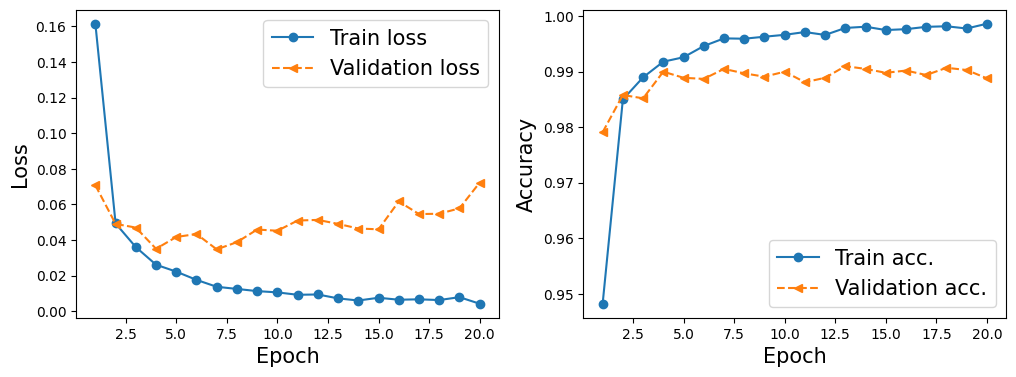

In [25]:
import matplotlib.pyplot as plt


x_arr = np.arange(len(hist[0])) + 1

fig = plt.figure(figsize=(12, 4))

ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist[0], '-o', label='Train loss')
ax.plot(x_arr, hist[1], '--<', label='Validation loss')
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)
ax.legend(fontsize=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist[2], '-o', label='Train acc.')
ax.plot(x_arr, hist[3], '--<', label='Validation acc.')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)

#plt.savefig('figures/14_13.png')
plt.show()

- Now, we evaluate the trained model on the test dataset:

In [26]:
torch.mps.synchronize()
model_cpu = model.cpu()

pred = model(mnist_test_dataset.data.unsqueeze(1) / 255.)
is_correct = (torch.argmax(pred, dim=1) == mnist_test_dataset.targets).float()

print(f'Test accuracy: {is_correct.mean():.4f}') 

Test accuracy: 0.9919


- The CNN model achieves an accuracy of 99% percent. 

- Finally, we can get the prediction results in the form of class-membership probabilities and convert them to predicted labels by using the `torch.argmax` function to find the element with the maximum probability.

- We will do this for a batch of 12 examples and visualize the input and predicted labels:

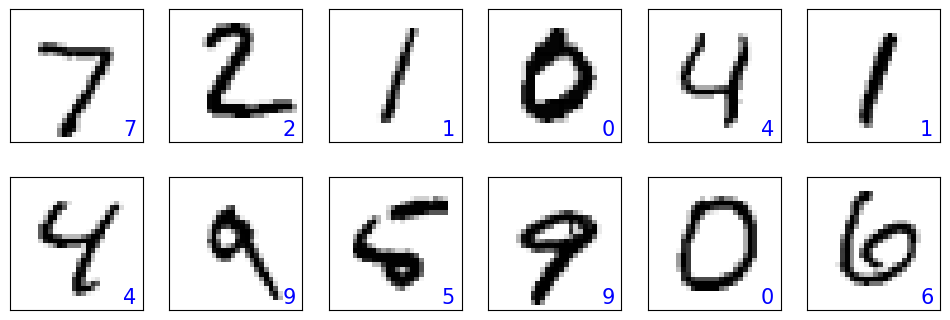

In [27]:
fig = plt.figure(figsize=(12, 4))
for i in range(12):
    ax = fig.add_subplot(2, 6, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    img = mnist_test_dataset[i][0][0, :, :]
    pred = model(img.unsqueeze(0).unsqueeze(1)) # alternatively: mnist_test_dataset.data[i].float()
    y_pred = torch.argmax(pred)
    ax.imshow(img, cmap='gray_r')
    ax.text(0.9, 0.1, y_pred.item(), 
            size=15, color='blue',
            horizontalalignment='center',
            verticalalignment='center', 
            transform=ax.transAxes)
    
    
#plt.savefig('figures/14_14.png')
plt.show()

- In this set of plotted examples, all the predicted labels are correct.

In [110]:
import os

if not os.path.exists('models'):
    os.mkdir('models')

path = 'models/mnist-cnn.ph'
torch.save(model, path)

---

In [57]:
X = np.array([[1,2],[3,6],[5,10]])

X_min = X.min(axis=0)
X_max = X.max(axis=0)

numerator = (X - X_min)
denominator = (X_max - X_min)

X_scaled = numerator / denominator
print(X_scaled)

[[0.  0. ]
 [0.5 0.5]
 [1.  1. ]]


In [58]:
X_scaled.shape

(3, 2)

In [52]:
X_min

array([1, 2])

In [53]:
X_max

array([ 5, 10])

In [61]:
import numpy as np

def minmax_scale(X, axis=0, eps=1e-12):
    """
    Min-max scale array X to range [0, 1].
    
    Parameters
    ----------
    X : np.ndarray
        Input array (1D or 2D).
    axis : int, default=0
        Axis along which scaling is applied:
        - axis=0 → scale each column (features) independently (common for ML).
        - axis=1 → scale each row independently.
    eps : float, default=1e-12
        Small constant to avoid division-by-zero.
        
    Returns
    -------
    np.ndarray (float)
        Scaled array with same shape as X.
    """
    X = np.asarray(X, dtype=float)  # ensure float output
    
    X_min = np.min(X, axis=axis, keepdims=True)
    X_max = np.max(X, axis=axis, keepdims=True)
    
    return (X - X_min) / (X_max - X_min + eps)


new = minmax_scale(X)
print(new)

[[0.  0. ]
 [0.5 0.5]
 [1.  1. ]]


In [62]:
type(new)

numpy.ndarray